In [123]:
import locale

locale.setlocale(locale.LC_NUMERIC, "pl_PL.UTF-8")

'pl_PL.UTF-8'

# Lista projektów realizowanych z Funduszy Europejskich w Polsce w latach 2014-2020 - 31 stycznia 2022 r.

Data udostępnienia: 2 lutego 2022, 14:01  
Dane na dzień: 2 lutego 2022  
Źródło: [https://dane.gov.pl/pl/dataset/1176,lista-beneficjentow-projektow-funduszy-europejskich-2014-2020/resource/36335/table](https://dane.gov.pl/pl/dataset/1176,lista-beneficjentow-projektow-funduszy-europejskich-2014-2020/resource/36335/table)

## Wykaz kolumn
| Index | Label | Data type |
| ----- | ----- | --------- |
|  0 | Tytuł projektu/ Project name | String |
|  1 | Skrócony opis [do 2000 znaków] / Project summary | String |
|  2 | Numer umowy/decyzji/ Contract number | String |
|  3 | Nazwa beneficjenta/ Beneficiary name | String |
|  4 | Fundusz/ Fund | String |
|  5 | Program/ Programme | String |
|  6 | Priorytet/ Priority axis | String |
|  7 | Działanie/ Measure | String |
|  8 | Poddziałanie/ Submeasure | String |
|  9 | Wartość projektu (w zł, dla projektów EWT w euro)/ Total project value (PLN, for ETC projects EUR) | Float |
| 10 | Wydatki kwalifikowalne (w zł, dla projektów EWT w euro)/ Total eligible expenditure (PLN, for ETC projects EUR) | Float |
| 11 | Wartość unijnego dofinansowania (w zł, dla projektów EWT w euro)/ Amount of EU co-financing (PLN, for ETC projects EUR) | Float |
| 12 | Poziom unijnego dofinansowania w procentach (w %)/ Union co-financing rate (%) | Float |
| 13 | Forma finansowania/ Form of finance | String |
| 14 | Miejsce realizacji projektu/ Project location | String |
| 15 | Typ obszaru, na którym realizowany jest projekt/ Territory type | String |
| 16 | Data rozpoczęcia realizacji projektu/ Project start date | Date |
| 17 | Data zakończenia realizacji projektu/ Project end date | Date |
| 18 | Projekt konkursowy czy pozakonkursowy/ Project implemented under competitive or non-competitive procedure | Konkursowy / Nadzwyczajny / Pozakonkursowy |
| 19 | Dziedzina działalności gospodarczej, której dotyczy projekt/ Area of economic activity | String |
| 20 | Obszar wsparcia projektu/ Area of project intervention | String |
| 21 | Cel projektu/ Project thematic objective | String |
| 22 | Cel uzupełniający dla projektów EFS/ ESF secondary theme | String |
| 23 | Projekt realizowany w ramach terytorialnych mechanizmów wdrażania/ Project implemented under territorial delivery mechanisms | ZIT / RKLS / Nie dotyczy |
| 24 | Finansowanie zakończone/ Funding completed | Tak/Nie |


## Ładowanie danych
Usuwane są kolumny:
1. Skrócony opis [do 2000 znaków] / Project summary
2. Numer umowy/decyzji/ Contract number

In [124]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rcParams['figure.dpi'] = 150


df = pd.read_csv("data.csv", sep=";").set_axis([
    "Name",
    "Summary",
    "Contract",
    "Beneficiary",
    "Fund",
    "Program",
    "Priority",
    "Measure",
    "Submeasure",
    "Total project value",
    "Total eligible expenditure",
    "Amount of EU co-financing",
    "Union co-financing rate (%)",
    "Form of finance",
    "Project location",
    "Territory type",
    "Project start date",
    "Project end date",
    "Procedure type",
    "Area of economic activity",
    "Area of project intervention",
    "Project thematic objective",
    "ESF secondary theme",
    "Territorial delivery mechanisms",
    "Funding completed"
], axis=1, inplace=False)
df.drop(df.columns[[1, 2]], axis=1, inplace=True)

### Czyszczenie typów dla kolumn z liczbami oraz Tak/Nie

In [125]:
fix_format = lambda n: float(n.replace(',', '.')) if type(n) == str else float(n)
df["Total project value"] = df["Total project value"].map(fix_format)
df["Total eligible expenditure"] = df["Total eligible expenditure"].map(fix_format)
df["Amount of EU co-financing"] = df["Amount of EU co-financing"].map(fix_format)
df["Union co-financing rate (%)"] = df["Union co-financing rate (%)"].map(fix_format)

In [126]:
map_boolean = lambda x: False if x.lower() == "nie" else True
df["Funding completed"] = df["Funding completed"].map(map_boolean)

### Usunięcie testowej danej

In [127]:
dropped = df.iloc[[41743]]
_ = df.drop(41743, axis=0, inplace=True)
dropped

,Name,Beneficiary,Fund,Program,Priority,Measure,Submeasure,Total project value,Total eligible expenditure,Amount of EU co-financing,...,Territory type,Project start date,Project end date,Procedure type,Area of economic activity,Area of project intervention,Project thematic objective,ESF secondary theme,Territorial delivery mechanisms,Funding completed
41743,Test,TEST,EFRR,Regionalny Program Operacyjny Województwa Łódz...,2. Innowacyjna i konkurencyjna gospodarka,2.3. Zwiększenie konkurencyjności MŚP,2.3.1. Innowacje w MŚP,1.0,0.0,0.0,...,01 Duże obszary miejskie (o ludności >50 000 i...,2020-11-01,2021-01-31,Nadzwyczajny,19 Edukacja,001 Ogólne inwestycje produkcyjne w małych i ś...,03 Wzmacnianie konkurencyjności małych i średn...,Projekt nie jest realizowany w ramach EFS,Nie dotyczy,False


In [128]:
df["Name"].count()

97701

In [129]:
df.head(1)

,Name,Beneficiary,Fund,Program,Priority,Measure,Submeasure,Total project value,Total eligible expenditure,Amount of EU co-financing,...,Territory type,Project start date,Project end date,Procedure type,Area of economic activity,Area of project intervention,Project thematic objective,ESF secondary theme,Territorial delivery mechanisms,Funding completed
0,Restoration of common culture heritage as a ba...,GMINA PUCHACZÓW,EFRR,The ENI Cross-border Cooperation Programme Pol...,1. Promotion of local culture and preservation...,1.1. Promotion of local culture and history,Brak poddziałania,2655000.0,2655000.0,2375000.0,...,03 Obszary wiejskie (o małej gęstości zaludnie...,2019-07-01,2022-06-30,Konkursowy,15 Turystyka oraz działalność związana z zakwa...,"094 Ochrona, rozwój i promowanie dóbr publiczn...","02 Zwiększanie dostępności, stopnia wykorzysta...",Projekt nie jest realizowany w ramach EFS,Nie dotyczy,False


## Liczba unikalnych wartości dla poszczególnych kolumn

Name                               90747
Beneficiary                        50074
Fund                                   3
Program                               27
Priority                             222
Measure                              835
Submeasure                           739
Total project value                74220
Total eligible expenditure         72015
Amount of EU co-financing          74638
Union co-financing rate (%)         4944
Form of finance                        5
Project location                    4269
Territory type                         7
Project start date                  2374
Project end date                    2022
Procedure type                         3
Area of economic activity             24
Area of project intervention         110
Project thematic objective            20
ESF secondary theme                    9
Territorial delivery mechanisms        3
Funding completed                      2
dtype: int64


<BarContainer object of 23 artists>

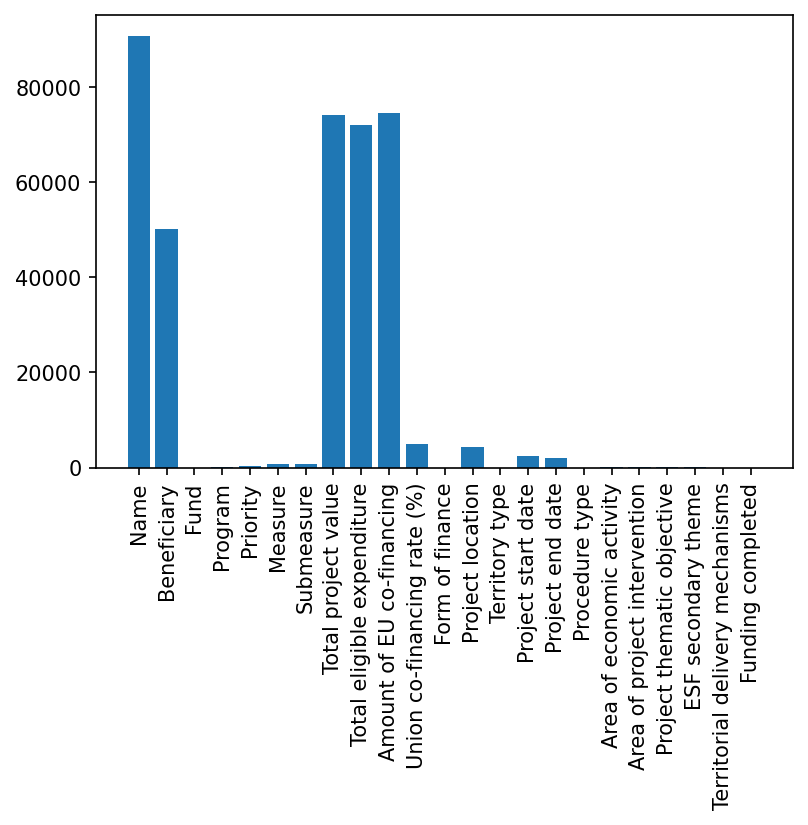

In [130]:
all_nunique = df.nunique()
print(all_nunique)
plt.xticks(rotation='vertical')
plt.bar(all_nunique.index, all_nunique, )

## Fundusze
Analiza wydatków w ramach funduszy:
- EFRR - Europejski Fundusz Rozwoju Regionalnego
- EFS - Europejski Fundusz Społeczny
- FS - Fundusz Spójności

Fund
EFRR    62826
EFS     32483
FS       2392
Name: Name, dtype: int64


<AxesSubplot:ylabel='% projektów'>

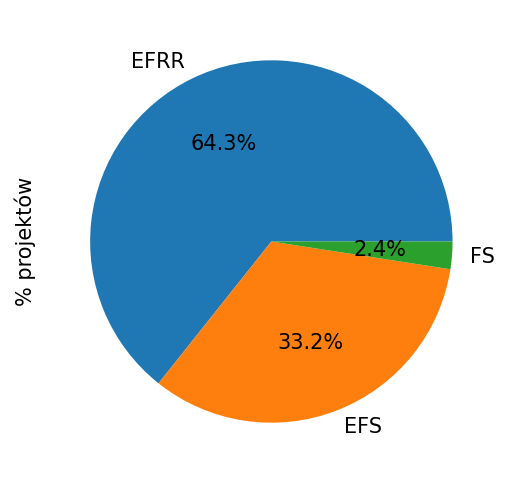

In [157]:
group_by_fund = df.groupby("Fund")
print(group_by_fund_count := group_by_fund["Name"].count())
group_by_fund_count.plot.pie(ylabel="% projektów", autopct="%1.1f%%")

Zdecydowana większość (około 64.3%) środków stanowiących dofinansowanie do projektów realizowanych w Polsce przekazywana była w ramach EFRR, natomiast 33.2% przekazywane było w ramach EFS, podczas gdy 2.4% przekazane zostało w ramach FS.

In [158]:
round(group_by_fund["Total project value"].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
Fund,,,,,,,,
EFRR,62824.0,4755071.32,3.068986e+07,2541.0,108578.57,667499.75,3020941.50,2.779093e+09
EFS,32483.0,2178508.62,6.429627e+06,1000.0,485960.54,996698.40,1962028.40,3.350751e+08
FS,2392.0,76819530.24,3.172936e+08,4800.0,2782750.00,8668188.49,30618978.19,5.176690e+09


Na podstawie tych danych zauważyć można, że w ramach Funduszu Społecznego na ogół realizowano projekty bardziej kosztownych niż w pozostałych funduszach, chociaż jest to fundusz w ramach którego zrealizowano ich najmniej. Dla FS mediana wynosiła 8 mln złotych, co stanowi około 10 razy więcej niż mediany dla EFRR oraz dla EFS.

W ramach funduszy EFRR oraz FS realizowano też bardziej zróżnicowane projekty, tj. takie które wymagają różnych nakładów kosztowych, co objawia się najmniejszym odchyleniem standardowym dla funduszu EFS.

In [133]:
round(group_by_fund["Union co-financing rate (%)"].describe(), 2)

,count,mean,std,min,25%,50%,75%,max
Fund,,,,,,,,
EFRR,62826.0,79.60,18.33,0.00,68.46,85.0,100.0,100.0
EFS,32483.0,84.88,2.46,38.98,84.28,85.0,85.0,100.0
FS,2392.0,78.71,13.51,15.55,85.00,85.0,85.0,100.0


Projekty realizowane w ramach funduszu EFS na ogół są dofinansowywane na poziomie około 85% co objawia się wyjątkowo niskim odchyleniem standardowym, oraz średnią i medianą wynoszącą około 85%.

Procent dofinansowania dla projektów w funduszach EFRR oraz FS jest znacznie bardziej zróżnicowany, a w przypadku funduszu EFRR zauważyć można, że dla 25 centyla dofinansowanie jest na poziomie około 68%, a dla centyla 75% jest na poziomie 100%. Wywnioskować z tego można, że w ramach funduszu EFRR występuje spora liczba projektów, które są dofinansowane w mniej niż 70%, lub w więcej niż 85% całkowitej wartości projektu.

## Procentowa ilość pieniędzy wydana w ramach funduszy

Fund
EFRR    2.987326e+11
EFS     7.076450e+10
FS      1.837523e+11
Name: Total project value, dtype: float64


<AxesSubplot:ylabel='Łączna wartość projektów'>

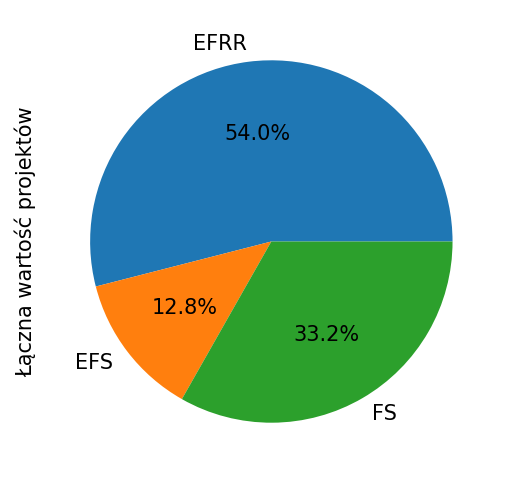

In [162]:
print(group_by_fund_sum := group_by_fund["Total project value"].sum())
group_by_fund_sum.plot.pie(ylabel="Łączna wartość projektów", autopct="%1.1f%%")


Fund
EFRR    1.829437e+11
EFS     6.021946e+10
FS      9.441420e+10
Name: Amount of EU co-financing, dtype: float64


<AxesSubplot:ylabel='Łączna wartość dofinansowania UE'>

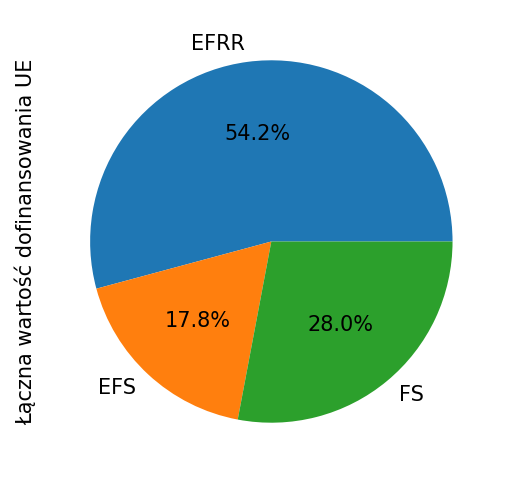

In [165]:
print(group_by_fund_sum := group_by_fund["Amount of EU co-financing"].sum())
group_by_fund_sum.plot.pie(ylabel="Łączna wartość dofinansowania UE", autopct="%1.1f%%")

### Asymetria i kurtoza

#### Asymetria

In [142]:
group_by_fund.skew(numeric_only=True)

,Total project value,Total eligible expenditure,Amount of EU co-financing,Union co-financing rate (%),Funding completed
Fund,,,,,
EFRR,42.426347,37.244156,45.447921,-0.740372,-0.735270
EFS,22.183675,22.183675,23.199221,0.174834,-0.510070
FS,8.634722,9.042194,9.326420,-2.028145,0.417054


#### Kurtoza

In [198]:
group_by_fund.apply(lambda x: pd.DataFrame.kurt(x, numeric_only=True))

,Total project value,Total eligible expenditure,Amount of EU co-financing,Union co-financing rate (%),Funding completed
Fund,,,,,
EFRR,2756.129627,2304.673147,3431.291855,-0.235357,-1.459425
EFS,794.442196,794.442196,864.137608,23.012291,-1.739936
FS,92.190158,106.346624,112.663084,2.944495,-1.827595


#### Histogramy

Fund
EFRR    AxesSubplot(0.125,0.125;0.775x0.755)
EFS     AxesSubplot(0.125,0.125;0.775x0.755)
FS      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

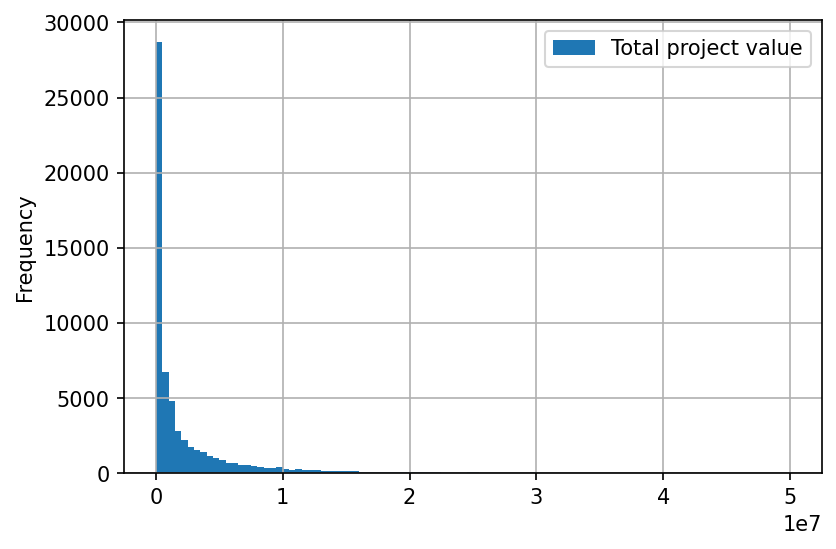

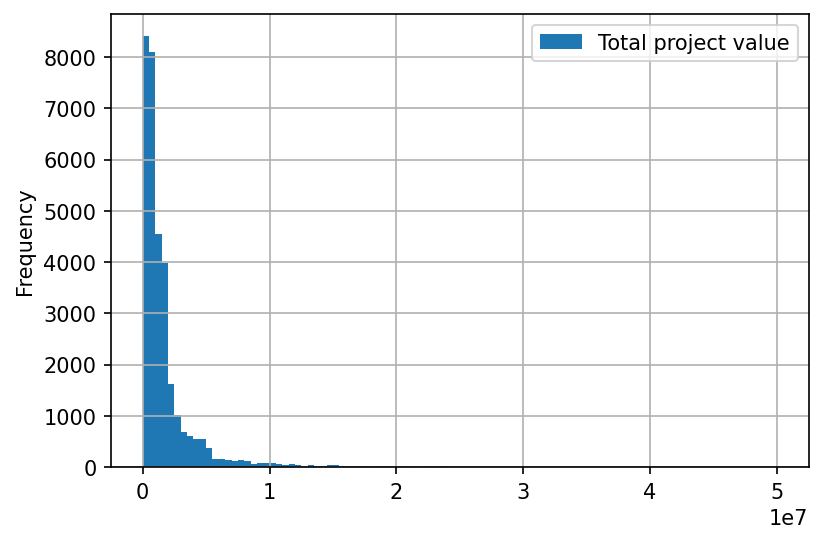

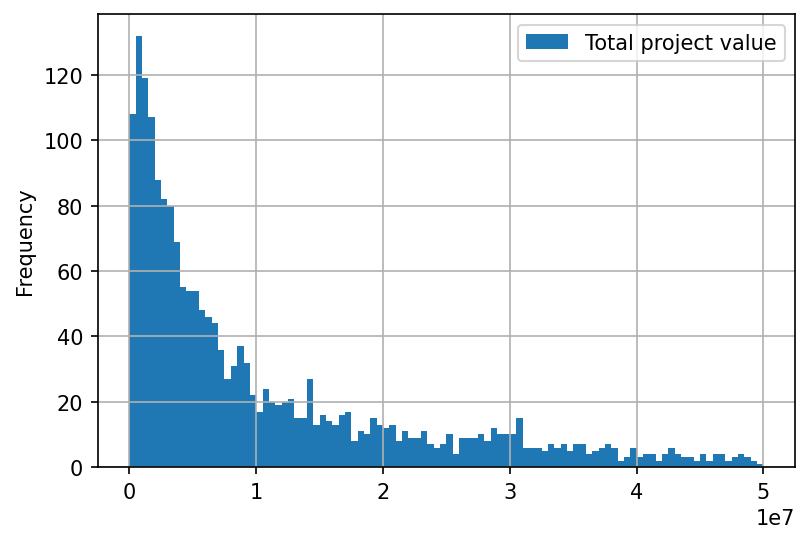

In [194]:
group_by_fund.plot.hist(column="Total project value", bins=100, range=[10e1, 5e7], grid=True, legend=True)

Fund
EFRR    AxesSubplot(0.125,0.125;0.775x0.755)
EFS     AxesSubplot(0.125,0.125;0.775x0.755)
FS      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

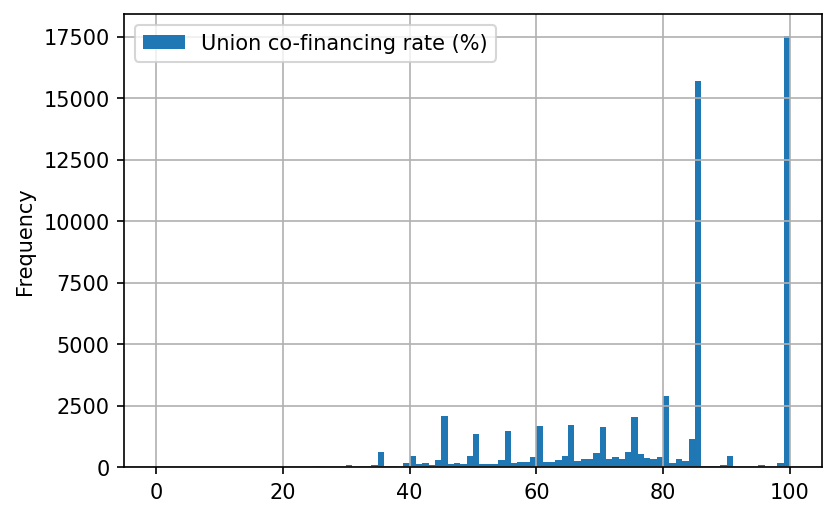

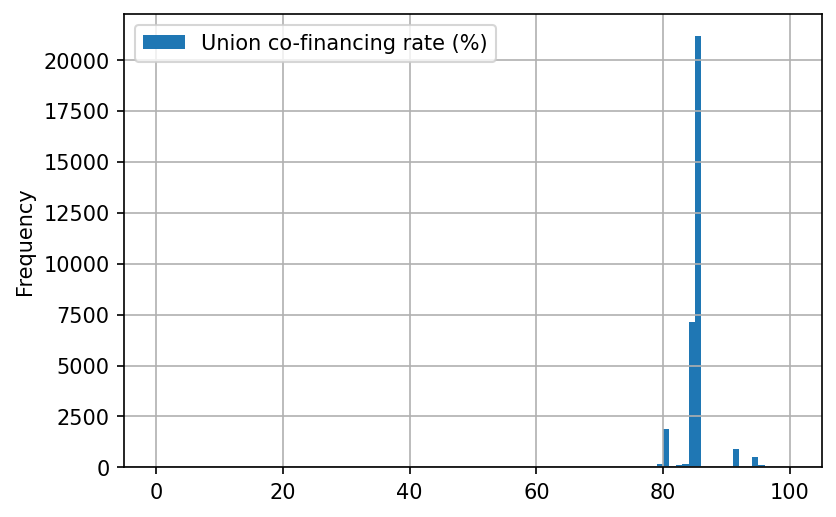

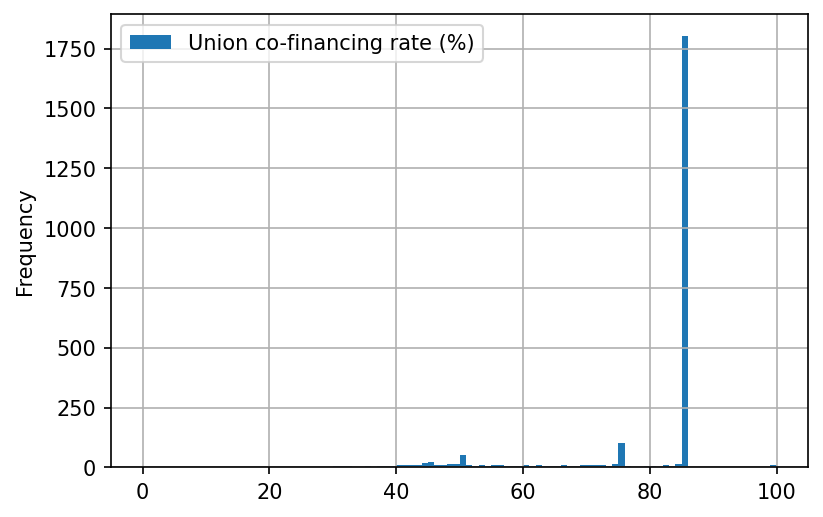

In [197]:
group_by_fund.plot.hist(column="Union co-financing rate (%)", bins=100, range=[0, 100], grid=True, legend=True)